In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [86]:
df = pd.read_csv("mymoviedb.csv",lineterminator="\n")
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


* After viewing dataset info. I came to know that Release_Date column needs to be casted into date_time to extract year as we are only concerned 
about years second thing is we do not need Overview,Original_Language and Poster_Url columns for our data anaysis

In [88]:
# Checking Genre column
df["Genre"].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

* Genres are seprated by commas followed by whitespaces

In [89]:
# Checking Null Values in the dataset
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

* There are no null values in our dataset

In [90]:
df.describe() # Checking the summary of the dataset

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


# Exploration Summary


* The dataframe contains 9,827 rows and 9 columns.
* The dataset appears tidy with no missing (NaN) or duplicated values.
* Release_Date needs to be converted to datetime format, and only the year part should be extracted.
* Overview, Original_Language, and Poster_URL are likely not useful for analysis and can be dropped.
* Vote_Average should be categorized into groups for better analysis.
* Genre contains comma-separated values and extra white spaces that need to be cleaned and handled properly.

# Data Preprocessing

In [91]:
# Data Cleaning
df["Release_Date"] = pd.to_datetime(df["Release_Date"])
print(df['Release_Date'].dtypes) # Verifying the Changes

datetime64[ns]


In [92]:
# Extracting Year
df['Release_Date'] = df["Release_Date"].dt.year
df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [93]:
df.tail(2)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
9825,2021,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...
9826,1984,Threads,Documentary style account of a nuclear holocau...,13.354,186,7.8,en,"War, Drama, Science Fiction",https://image.tmdb.org/t/p/original/lBhU4U9Eeh...


* Removing Unnecssary Columns

In [94]:
df.drop(columns=["Overview", "Original_Language", "Poster_Url"], inplace=True)
df.head() # Verifying Changes

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


* Categorizing Vote Average

In [95]:
df.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000,9827.000000
mean,2006.203623,40.326088,1392.805536,6.439534
std,15.685554,108.873998,2611.206907,1.129759
min,1902.000000,13.354000,0.000000,0.000000
25%,2000.000000,16.128500,146.000000,5.900000
50%,2011.000000,21.199000,444.000000,6.500000
75%,2017.000000,35.191500,1376.000000,7.100000
max,2024.000000,5083.954000,31077.000000,10.000000


In [96]:
def categorize_voteavg(df,col,labels):

    edges = [
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']

    ]

    df[col] = pd.cut(df[col],edges,labels= labels,duplicates='drop')
    return df

In [97]:
# define labels for edges
labels = ['not_popular', 'below_avg', 'average', 'popular']
categorize_voteavg(df,"Vote_Average",labels)
df["Vote_Average"].unique()


['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [98]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [99]:

df["Vote_Average"].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [100]:
print(df["Vote_Average"].isnull().sum()) # Checking Number of NAN values

100


In [101]:
df.dropna(inplace=True)
df.isnull().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [102]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


* First, we split the Genre column into a list for each movie. Then, we use explode to expand the dataframe so that each movie–genre pair appears on its own row.

In [103]:
df["Genre"] = df["Genre"].str.split(", ")
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [104]:
df["Genre"].dtypes

dtype('O')

In [105]:
# Casting Genre Column into a category for better analysis
df["Genre"] = df['Genre'].astype('category')
df["Genre"].dtypes



CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [107]:
df.nunique()


Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

* Now Data has been cleaned

# Data Visualization

# Which genre is the most frequent in Netflix movies?

In [108]:
# setting up seaborn configurations
sns.set_style('whitegrid')


In [109]:
# showing stats on genre column
df['Genre'].describe()


count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

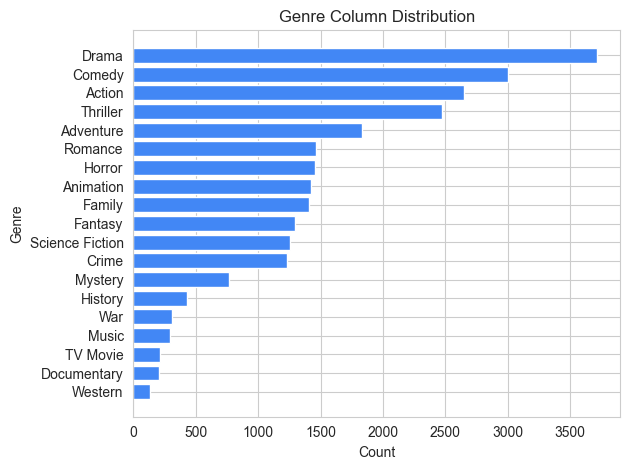

In [110]:
# Count values of Genre
genre_counts = df['Genre'].value_counts()

# Plot using matplotlib
plt.barh(genre_counts.index, genre_counts.values, color='#4287f5')
plt.title("Genre Column Distribution")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.gca().invert_yaxis()  # To match seaborn order (highest at top)
plt.show()

# Which genres have received the highest total votes?

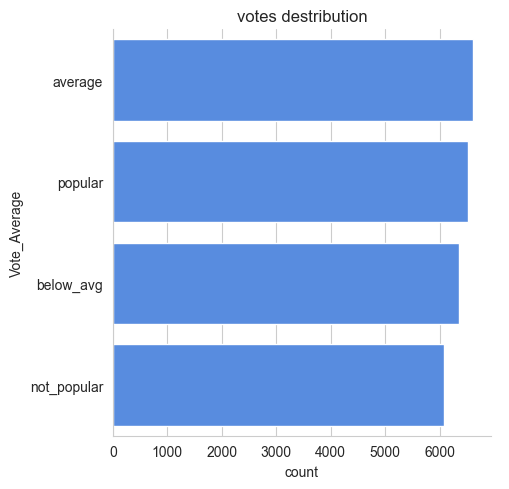

In [111]:
# visualizing vote_average column
sns.catplot(y = 'Vote_Average', data = df, kind = 'count',
 order = df['Vote_Average'].value_counts().index,
 color = '#4287f5')
plt.title('votes destribution')
plt.tight_layout()
plt.show() 

# Which movie has the highest popularity, and what is its genre?

In [112]:
df[df['Popularity'] == df['Popularity'].max()]


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


# Which movie has the lowest popularity, and what is its genre?

In [113]:
df[df['Popularity'] == df['Popularity'].min()]


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


# Q5: Which year has the most filmmed movies?

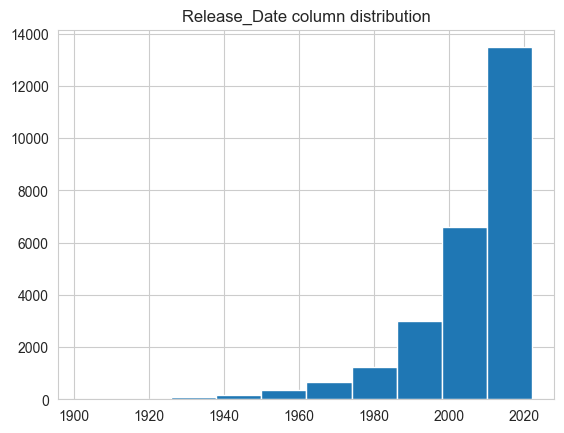

In [114]:
df['Release_Date'].hist()
plt.title('Release_Date column distribution')
plt.show()

---------

# Conclusion

# Conclusion / Insights from the Dataset

- **Most Frequent Genre:** Drama is the most frequent genre in the dataset, appearing in over 14% of the movies among 19 other genres.  
- **Most Popular Genre:** Drama also has the highest popularity among fans, representing more than 18.5% of movies with popular votes (6520 rows, ~25.5% of the dataset).  
- **Highest Popularity Movie:** *Spider-Man: No Way Home* has the highest popularity, belonging to the genres Action, Adventure, and Science Fiction.  
- **Lowest Popularity Movie:** *The United States, Thread* has the lowest popularity, with genres including Music, Drama, War, Sci-Fi, and History.  
- **Year with Most Filmed Movies:** 2020 had the highest number of movies filmed in the dataset.
